In [57]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import pycountry


#data file to work with
file = '../cleanData/CleanFullDataSet.csv'

#read data file
clean_data = pd.read_csv(file, low_memory = False)

In [58]:
# display the columns related to citizenship data 
start_df = pd.DataFrame(clean_data[['gender', 'ageBroad', 'Exploit Region', 'Exploit Country', 'Exploit Sub-Region']])
start_df.head(2)

,gender,ageBroad,Exploit Region,Exploit Country,Exploit Sub-Region
0,Female,18--20,unknown,unknown,unknown
1,Female,18--20,unknown,unknown,unknown


In [59]:
start_df.count()

gender                48773
ageBroad              48773
Exploit Region        47896
Exploit Country       47896
Exploit Sub-Region    47896
dtype: int64

In [60]:
start_df = start_df.dropna(how='any')
start_df.head()

,gender,ageBroad,Exploit Region,Exploit Country,Exploit Sub-Region
0,Female,18--20,unknown,unknown,unknown
1,Female,18--20,unknown,unknown,unknown
2,Female,18--20,unknown,unknown,unknown
3,Female,18--20,unknown,unknown,unknown
4,Female,18--20,unknown,unknown,unknown


In [61]:
replace_df = start_df.replace('unknown', np.NaN)

In [62]:
drop_df = replace_df.dropna(how='any')
drop_df.head()

,gender,ageBroad,Exploit Region,Exploit Country,Exploit Sub-Region
104,Female,18--20,Europe,Serbia,Southern Europe
105,Female,18--20,Europe,Serbia,Southern Europe
106,Female,18--20,Europe,Serbia,Southern Europe
107,Female,18--20,Europe,Serbia,Southern Europe
108,Female,18--20,Europe,Serbia,Southern Europe


In [63]:
drop_df.count()

gender                34632
ageBroad              34632
Exploit Region        34632
Exploit Country       34632
Exploit Sub-Region    34632
dtype: int64

In [64]:
exploit_df = drop_df.rename(columns = {'gender' : 'Gender', 'ageBroad' : 'Age Range',})
exploit_df.head(2)

,Gender,Age Range,Exploit Region,Exploit Country,Exploit Sub-Region
104,Female,18--20,Europe,Serbia,Southern Europe
105,Female,18--20,Europe,Serbia,Southern Europe


In [65]:
exploit_df['Exploit Country'].nunique()

55

In [66]:
exploit_df['Exploit Country'].value_counts()

United States of America    12512
Ukraine                      5399
Republic of Moldova          4504
Russian Federation           2738
Indonesia                    1777
Malaysia                      770
Cambodia                      555
Ghana                         544
United Arab Emirates          491
Belarus                       400
Thailand                      380
Senegal                       370
Bulgaria                      356
Haiti                         339
Poland                        326
Romania                       259
Serbia                        248
Kazakhstan                    222
Saudi Arabia                  218
Turkey                        197
North Macedonia               194
Uzbekistan                    193
Qatar                         152
Bosnia and Herzegovina        127
Uganda                        123
Jordan                        108
Oman                           94
Madagascar                     94
Trinidad and Tobago            85
Afghanistan   

In [67]:
regions = exploit_df['Exploit Region'].value_counts()
regions

Europe      14676
Americas    12967
Asia         5697
Africa       1292
Name: Exploit Region, dtype: int64

In [125]:
sub_regions = exploit_df['Exploit Sub-Region'].value_counts()
sub_regions

Eastern Europe                     14020
Northern America                   12512
South-eastern Asia                  3548
Western Asia                        1389
Sub-Saharan Africa                  1268
Southern Europe                      615
Central Asia                         495
Latin America and the Caribbean      455
Southern Asia                        155
Eastern Asia                         110
Western Europe                        24
Northern Africa                       24
Northern Europe                       17
Name: Exploit Sub-Region, dtype: int64

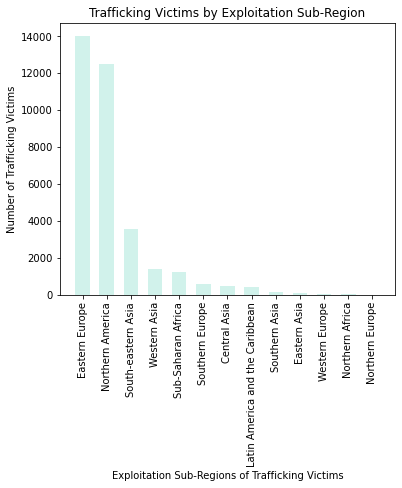

In [127]:
data = {'Eastern Europe' : 14020, 'Northern America': 12512, 'South-eastern Asia' : 3548, 'Western Asia': 1389, 'Sub-Saharan Africa': 1268,
       'Southern Europe': 614, 'Central Asia': 495, 'Latin America and the Caribbean': 455, 'Southern Asia': 155, 'Eastern Asia' : 110,
       'Western Europe':24, 'Northern Africa': 24, 'Northern Europe': 17 }
subreg = list(data.keys())
subcounts = list(data.values())

fig = plt.figure(figsize = (6, 5))

plt.bar(subreg, subcounts, color = '#D1F2EB', width = 0.6)
plt.xlabel('Exploitation Sub-Regions of Trafficking Victims')
plt.ylabel('Number of Trafficking Victims')           
plt.title("Trafficking Victims by Exploitation Sub-Region")
plt.xticks(rotation=90)
plt.savefig("Images/exploit_subregion_bar.png")
plt.show() 

## ASIA

In [69]:
#create a data frame for each region, based on gender
is_female = exploit_df['Gender'] == 'Female'
is_male = exploit_df['Gender'] == 'Male'
is_asia = exploit_df['Exploit Region'] == 'Asia'

female_asia = pd.DataFrame(exploit_df[is_female & is_asia])
male_asia = pd.DataFrame(exploit_df[is_male & is_asia])

female_asia.nunique()

Gender                 1
Age Range              9
Exploit Region         1
Exploit Country       24
Exploit Sub-Region     5
dtype: int64

In [70]:
male_asia.nunique()

Gender                 1
Age Range              9
Exploit Region         1
Exploit Country       10
Exploit Sub-Region     4
dtype: int64

In [71]:
asia_df = exploit_df.loc[exploit_df['Exploit Region'] == 'Asia', ['Gender', 'Age Range', 'Exploit Sub-Region', 'Exploit Country']]
asia_df.head(2)

,Gender,Age Range,Exploit Sub-Region,Exploit Country
1473,Female,21--23,Western Asia,United Arab Emirates
1474,Female,21--23,Western Asia,United Arab Emirates


In [72]:
asia_df.copy()
asia_df.head()

,Gender,Age Range,Exploit Sub-Region,Exploit Country
1473,Female,21--23,Western Asia,United Arab Emirates
1474,Female,21--23,Western Asia,United Arab Emirates
1475,Female,21--23,Western Asia,United Arab Emirates
1476,Female,21--23,Western Asia,United Arab Emirates
1477,Female,21--23,Western Asia,United Arab Emirates


In [73]:
country_counts = asia_df['Exploit Country'].value_counts()
country_counts

Indonesia               1777
Malaysia                 770
Cambodia                 555
United Arab Emirates     491
Thailand                 380
Kazakhstan               222
Saudi Arabia             218
Turkey                   197
Uzbekistan               193
Qatar                    152
Jordan                   108
Oman                      94
Afghanistan               83
China                     79
Lebanon                   55
Tajikistan                54
India                     46
Syrian Arab Republic      41
Singapore                 37
Hong Kong                 31
Turkmenistan              26
Bangladesh                26
Bahrain                   22
Viet Nam                  16
Philippines               13
Cyprus                    11
Name: Exploit Country, dtype: int64

In [74]:
asia_sub_counts = asia_df['Exploit Sub-Region'].value_counts()
asia_sub_counts

South-eastern Asia    3548
Western Asia          1389
Central Asia           495
Southern Asia          155
Eastern Asia           110
Name: Exploit Sub-Region, dtype: int64

In [124]:
asia_sub_list = asia_df['Exploit Sub-Region'].unique()
list(asia_sub_list)

['Western Asia',
 'Central Asia',
 'South-eastern Asia',
 'Southern Asia',
 'Eastern Asia']

In [76]:
asia_country_list = asia_df['Exploit Country'].unique()
asia_country_list

array(['United Arab Emirates', 'Cyprus', 'Turkey', 'Uzbekistan',
       'Malaysia', 'Tajikistan', 'Indonesia', 'Kazakhstan', 'Thailand',
       'Turkmenistan', 'Jordan', 'Afghanistan', 'Syrian Arab Republic',
       'Qatar', 'Saudi Arabia', 'Singapore', 'Oman', 'Bahrain', 'Lebanon',
       'Philippines', 'Cambodia', 'China', 'Viet Nam', 'Hong Kong',
       'India', 'Bangladesh'], dtype=object)

In [77]:
asia_gender_counts = asia_df['Gender'].value_counts()
asia_gender_counts

Female    3268
Male      2429
Name: Gender, dtype: int64

In [87]:
# use groupby to separate the data into fields acoording to country
grouped_asia_df = asia_df.groupby(['Exploit Country', 'Gender', 'Age Range'])

#the object returned is a groupby object and cannot be returned normally
print(grouped_asia_df)

#in order to be visualized, a data function must be used
grouped_asia_df.count().head(60)

Exploit Sub-Region
Exploit Country Gender Age Range                    
Afghanistan     Male   9--17                      83
Bahrain         Female 30--38                     22
Bangladesh      Female 9--17                      26
Cambodia        Female 0--8                       31
                       18--20                     45
                       21--23                     26
                       30--38                     32
                       9--17                     169
                Male   18--20                     30
                       21--23                     25
                       24--26                     17
                       9--17                     180
China           Female 18--20                     15
                       21--23                     27
                       24--26                     15
                       27--29                     11
                       9--17                      11
Cyprus          Female 21--23                     11
Hong Kong       Female 30--38                     18
                       39--47                     13
India           Female 9--17                      46
Indonesia       Female 18--20                     84
                       21--23                     38
                       24--26                     16
                       27--29                     14
                       30--38                     49
                       9--17                      44
                Male   18--20                     43
                       21--23                    132
                       24--26                    208
                       27--29                    206
                       30--38                    621
                       39--47                    243
                       48+                        79
Jordan          Female 27--29                     12
                       30--38                     70
                       39--47                     26
Kazakhstan      Female 18--20                     39
                       21--23                     15
                Male   24--26                     11
                       30--38                    106
                       39--47                     51
Lebanon         Female 30--38                     28
                       39--47                     27
Malaysia        Female 18--20                     75
                       21--23                     83
                       24--26                     93
                       27--29                     91
                       30--38                    230
                       39--47                     69
                       9--17                      43
                Male   24--26                     17
                       30--38                     54
                       39--47                     15
Oman            Female 27--29                     19
                       30--38                     54
                       39--47                     21
Philippines     Male   18--20                     13
Qatar           Female 24--26                     12
                       27--29                     23

In [91]:
# asia_df_copy=asia_df.copy()

In [92]:
# # use groupby to separate the data into fields acoording to country
# grouped_asia_region_df = asia_df.groupby(['Exploit Region', 'Gender', 'Age Range'])

# #the object returned is a groupby object and cannot be returned normally
# print(grouped_asia_region_df)

# #in order to be visualized, a data function must be used
# grouped_asia_region_df.count().head(60)

## Europe

In [83]:
#create a data frame for each region, based on gender
is_female = exploit_df['Gender'] == 'Female'
is_male = exploit_df['Gender'] == 'Male'
is_europe = exploit_df['Exploit Region'] == 'Europe'
female_europe = pd.DataFrame(exploit_df[is_female & is_europe])
male_europe = pd.DataFrame(exploit_df[is_male & is_europe])

#show unique values in the series
female_europe.nunique() 

Gender                 1
Age Range              9
Exploit Region         1
Exploit Country       14
Exploit Sub-Region     3
dtype: int64

In [84]:
male_europe.nunique()

Gender                1
Age Range             9
Exploit Region        1
Exploit Country       6
Exploit Sub-Region    2
dtype: int64

In [86]:
europe_df = exploit_df.loc[exploit_df['Exploit Region'] == 'Europe', ['Gender', 'Age Range', 'Exploit Sub-Region', 'Exploit Country']]
europe_df.head()

,Gender,Age Range,Exploit Sub-Region,Exploit Country
104,Female,18--20,Southern Europe,Serbia
105,Female,18--20,Southern Europe,Serbia
106,Female,18--20,Southern Europe,Serbia
107,Female,18--20,Southern Europe,Serbia
108,Female,18--20,Southern Europe,Serbia


In [94]:
# copy the df so we don't overwrite original europe_df data
europe_df_copy = europe_df.copy()

In [95]:
# See how many countries in this region are included in the data set
euro_country_counts = europe_df_copy['Exploit Country'].value_counts()
euro_country_counts

Ukraine                   5399
Republic of Moldova       4504
Russian Federation        2738
Belarus                    400
Bulgaria                   356
Poland                     326
Romania                    259
Serbia                     248
North Macedonia            194
Bosnia and Herzegovina     127
Czechia                     38
Austria                     24
Italy                       24
Albania                     22
Denmark                     17
Name: Exploit Country, dtype: int64

In [96]:
europe_sub_counts = europe_df_copy['Exploit Sub-Region'].value_counts()
europe_sub_counts

Eastern Europe     14020
Southern Europe      615
Western Europe        24
Northern Europe       17
Name: Exploit Sub-Region, dtype: int64

In [97]:
europe_country_list = europe_df_copy['Exploit Country'].unique()
europe_country_list

array(['Serbia', 'Bosnia and Herzegovina', 'North Macedonia',
       'Russian Federation', 'Republic of Moldova', 'Albania', 'Bulgaria',
       'Italy', 'Romania', 'Czechia', 'Poland', 'Ukraine', 'Austria',
       'Belarus', 'Denmark'], dtype=object)

In [98]:
europe_gender_counts = europe_df_copy['Gender'].value_counts()
europe_gender_counts

Female    9051
Male      5625
Name: Gender, dtype: int64

In [99]:
# use groupby to separate the data into fields acoording to country
europe_df_copy = europe_df.copy()
grouped_europe_df = europe_df_copy.groupby(['Exploit Country', 'Gender', 'Age Range'])

#the object returned is a groupby object and cannot be returned normally
print(grouped_europe_df)

#in order to be visualized, a data function must be used
grouped_europe_df.count()

Exploit Sub-Region
Exploit Country Gender Age Range                    
Albania         Female 18--20                     11
                       21--23                     11
Austria         Female 30--38                     12
                       39--47                     12
Belarus         Female 27--29                     12
...                                              ...
Ukraine         Male   27--29                    249
                       30--38                    950
                       39--47                    477
                       48+                       328
                       9--17                      88

[99 rows x 1 columns]

## Americas

In [100]:
#create a data frame for each region, based on gender
is_female = exploit_df['Gender'] == 'Female'
is_male = exploit_df['Gender'] == 'Male'
is_americas = exploit_df['Exploit Region'] == 'Americas'

female_americas = pd.DataFrame(exploit_df[is_female & is_americas])
male_americas = pd.DataFrame(exploit_df[is_male & is_americas])

female_americas.nunique()

Gender                1
Age Range             9
Exploit Region        1
Exploit Country       4
Exploit Sub-Region    2
dtype: int64

In [101]:
male_americas.nunique()

Gender                1
Age Range             6
Exploit Region        1
Exploit Country       3
Exploit Sub-Region    2
dtype: int64

In [103]:
americas_df = exploit_df.loc[exploit_df['Exploit Region'] == 'Americas', ['Gender', 'Age Range', 'Exploit Sub-Region', 'Exploit Country']]
americas_df.head()

,Gender,Age Range,Exploit Sub-Region,Exploit Country
7524,Female,24--26,Latin America and the Caribbean,Ecuador
7525,Female,24--26,Latin America and the Caribbean,Ecuador
7526,Female,24--26,Latin America and the Caribbean,Ecuador
7527,Female,24--26,Latin America and the Caribbean,Ecuador
7528,Female,24--26,Latin America and the Caribbean,Ecuador


In [104]:
# copy the df so we don't overwrite original europe_df data
americas_df_copy = americas_df.copy()

In [105]:
americas_country_counts = americas_df_copy['Exploit Country'].value_counts()
americas_country_counts

United States of America    12512
Haiti                         339
Trinidad and Tobago            85
Argentina                      18
Ecuador                        13
Name: Exploit Country, dtype: int64

In [106]:
americas_country_list = americas_df_copy['Exploit Country'].unique()
americas_country_list

array(['Ecuador', 'Haiti', 'Argentina', 'Trinidad and Tobago',
       'United States of America'], dtype=object)

In [107]:
americas_sub_counts = americas_df_copy['Exploit Sub-Region'].value_counts()
americas_sub_counts

Northern America                   12512
Latin America and the Caribbean      455
Name: Exploit Sub-Region, dtype: int64

In [108]:
americas_gender_counts = americas_df_copy['Gender'].value_counts()
americas_gender_counts

Female    12404
Male        563
Name: Gender, dtype: int64

In [110]:
# use groupby to separate the data into fields acoording to country
grp_americas_df = americas_df_copy.groupby(['Exploit Country', 'Gender', 'Age Range'])

#the object returned is a groupby object and cannot be returned normally
print(grp_americas_df)

#in order to be visualized, a data function must be used
grp_americas_df.count()

Exploit Sub-Region
Exploit Country          Gender Age Range                    
Argentina                Female 9--17                      18
Ecuador                  Female 24--26                     13
Haiti                    Female 0--8                       15
                                9--17                     190
                         Male   0--8                       24
                                9--17                     110
Trinidad and Tobago      Male   21--23                     32
                                24--26                     17
                                27--29                     11
                                30--38                     25
United States of America Female 0--8                      109
                                18--20                   2138
                                21--23                   1473
                                24--26                   1069
                                27--29                    707
                                30--38                   1388
                                39--47                    403
                                48+                       167
                                9--17                    4714
                         Male   0--8                       47
                                21--23                     19
                                9--17                     278

## Africa

In [111]:
#create a data frame for each region, based on gender
is_female = exploit_df['Gender'] == 'Female'
is_male = exploit_df['Gender'] == 'Male'
is_africa = exploit_df['Exploit Region'] == 'Africa'

female_africa = pd.DataFrame(exploit_df[is_female & is_africa])
male_africa = pd.DataFrame(exploit_df[is_male & is_africa])

female_africa.nunique()

Gender                1
Age Range             6
Exploit Region        1
Exploit Country       6
Exploit Sub-Region    2
dtype: int64

In [112]:
male_africa.nunique()

Gender                1
Age Range             5
Exploit Region        1
Exploit Country       7
Exploit Sub-Region    2
dtype: int64

In [116]:
africa_df = exploit_df.loc[exploit_df['Exploit Region'] == 'Africa', ['Gender', 'Age Range', 'Exploit Sub-Region', 'Exploit Country']]
africa_df.head()

,Gender,Age Range,Exploit Sub-Region,Exploit Country
1606,Female,0--8,Sub-Saharan Africa,Ghana
1607,Female,0--8,Sub-Saharan Africa,Ghana
1608,Female,0--8,Sub-Saharan Africa,Ghana
1609,Female,0--8,Sub-Saharan Africa,Ghana
1610,Female,0--8,Sub-Saharan Africa,Ghana


In [117]:
africa_df_copy = africa_df.copy()

In [118]:
africa_country_counts = africa_df_copy['Exploit Country'].value_counts()
africa_country_counts

Ghana           544
Senegal         370
Uganda          123
Madagascar       94
Sierra Leone     81
South Africa     36
Mauritius        20
Egypt            13
Libya            11
Name: Exploit Country, dtype: int64

In [120]:
africa_country_list = africa_df_copy['Exploit Country'].unique()
africa_country_list

array(['Ghana', 'Uganda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Egypt', 'Mauritius', 'Libya', 'Madagascar'], dtype=object)

In [121]:
africa_sub_counts = africa_df_copy['Exploit Sub-Region'].value_counts()
africa_sub_counts

Sub-Saharan Africa    1268
Northern Africa         24
Name: Exploit Sub-Region, dtype: int64

In [122]:
africa_gender_counts = africa_df_copy['Gender'].value_counts()
africa_gender_counts

Male      836
Female    456
Name: Gender, dtype: int64

In [123]:
# use groupby to separate the data into fields acoording to country
grp_africa_df = africa_df_copy.groupby(['Exploit Country', 'Gender', 'Age Range'])

#the object returned is a groupby object and cannot be returned normally
print(grp_africa_df)

#in order to be visualized, a data function must be used
grp_africa_df.count()

Exploit Sub-Region
Exploit Country Gender Age Range                    
Egypt           Male   9--17                      13
Ghana           Female 0--8                       53
                       9--17                     154
                Male   0--8                       72
                       9--17                     265
Libya           Female 30--38                     11
Madagascar      Female 21--23                     18
                       24--26                     20
                       27--29                     21
                       30--38                     35
Mauritius       Male   30--38                     20
Senegal         Female 9--17                      19
                Male   0--8                       14
                       18--20                     14
                       9--17                     323
Sierra Leone    Female 30--38                     16
                       9--17                      40
                Male   9--17                      25
South Africa    Male   21--23                     18
                       30--38                     18
Uganda          Female 0--8                       46
                       9--17                      23
                Male   0--8                       54